# Load the Libraries

In [1]:
#import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the dataset

In [160]:
#load the data file
cra_df_data = pd.read_csv("D:/Praachi/Python/Assignments/EDA_CreditCard/application_data.csv")

In [3]:
#check shape (rows and cols)
cra_df_data.shape

(307511, 122)

# Finding NULL values

In [4]:
cra_df_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [20]:
cra_df_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [13]:
cra_df_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


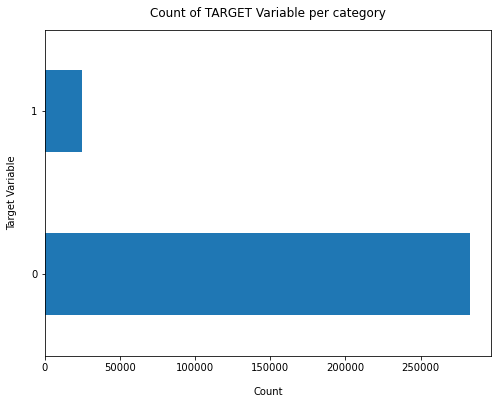

In [5]:
cra_df_data['TARGET'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [35]:
100*cra_df_data['TARGET'].value_counts()/len(cra_df['TARGET'])

0    3286.282260
1     288.595675
Name: TARGET, dtype: float64

In [25]:
cra_df_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Data is highly imbalanced, ratio =91:8
So we analyse the data with other features while taking the target values separately to get some insights.

In [26]:
cra_df_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

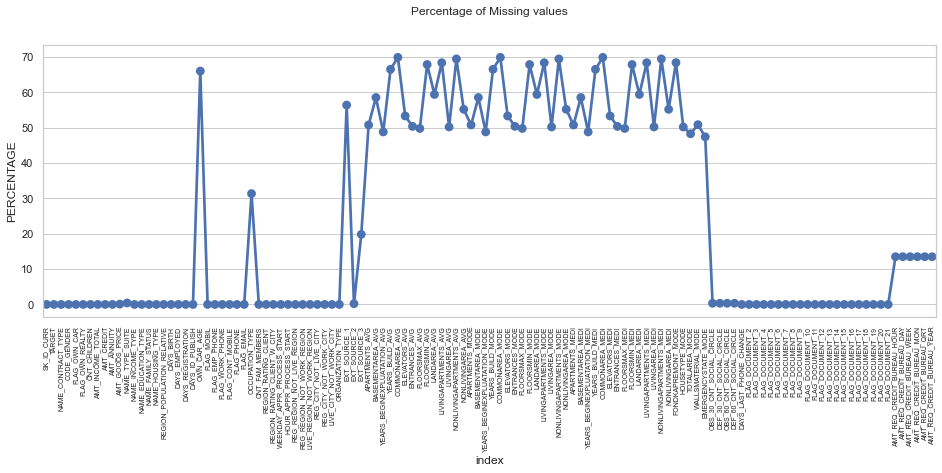

In [219]:
missing = pd.DataFrame((cra_df_data.isnull().sum())*100/cra_df_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [15]:
#cra_df_data.dropna(how = 'any', inplace = True)

In [5]:
cra_df_data.shape

(307511, 122)

Missing Data - Initial Intuition
 Here, we don't have any missing data.

# Data Cleaning

In [162]:
cra_df = cra_df_data.copy()

In [20]:
cra_df.isnull().sum()
#cra_df.info(verbose = True)

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [38]:
cra_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

<AxesSubplot:xlabel='AMT_ANNUITY'>

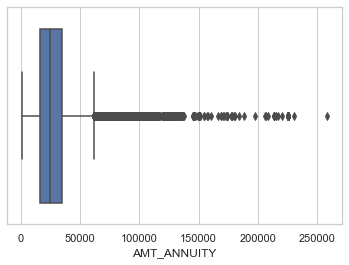

In [136]:
#Visualisation of Credited Amount for Gender using BOXPLOT
sns.set(style='whitegrid')
sns.boxplot(x='AMT_ANNUITY',  data=cra_df)

<AxesSubplot:xlabel='CODE_GENDER', ylabel='AMT_CREDIT'>

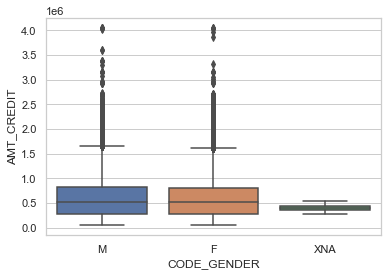

In [137]:
#Visualisation of Credited Amount for Gender using BOXPLOT
sns.set(style='whitegrid')
sns.boxplot(x='CODE_GENDER', y='AMT_CREDIT', data=cra_df)

<AxesSubplot:xlabel='TARGET', ylabel='AMT_CREDIT'>

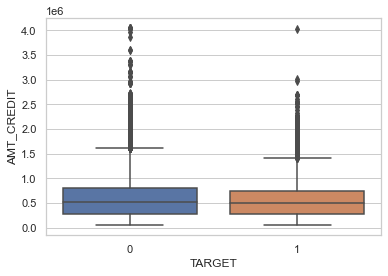

In [138]:
#Visualisation of Credited Amount for Gender using BOXPLOT
sns.set(style='whitegrid')
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=cra_df)

# Dropping columns with missing values greater than or equal to 50%

In [220]:
#Drop columns
df = cra_df.drop(['DAYS_LAST_PHONE_CHANGE', 'SK_ID_CURR', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
              'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
              'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
              'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
              'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
              'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
              'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
              'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
              'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'TOTALAREA_MODE',
              'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
              'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
              'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
              'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
              'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
              'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR',
               'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], axis=1)
#cra_df.head()


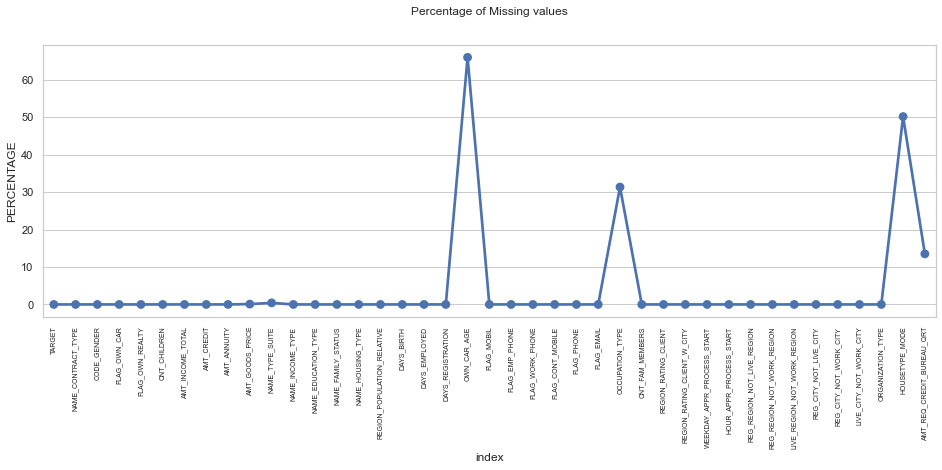

In [221]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [186]:
df.shape

(307511, 41)

# Filling the column's missing values with mean, median or mode

In [187]:
suite=df['NAME_TYPE_SUITE'].mode()
suite

0    Unaccompanied
dtype: object

In [188]:
df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].fillna('Unaccompanied')

In [189]:
df['NAME_TYPE_SUITE'].isnull().sum()

0

In [190]:
suite=df['OWN_CAR_AGE'].median()
suite

9.0

In [191]:
df['OWN_CAR_AGE']=df['OWN_CAR_AGE'].fillna(0)

In [211]:
ann=df['AMT_ANNUITY'].median()
ann

24903.0

In [199]:
df['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [201]:
df['AMT_GOODS_PRICE'].isnull().sum()

278

In [202]:
df['AMT_GOODS_PRICE']=df['AMT_GOODS_PRICE'].fillna(0)

In [197]:
df['AMT_REQ_CREDIT_BUREAU_QRT']=df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df['AMT_REQ_CREDIT_BUREAU_QRT'].median())

In [192]:
occu=df['OCCUPATION_TYPE'].mode()
occu

0    Laborers
dtype: object

In [193]:
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna('Laborers')

In [173]:
df['OCCUPATION_TYPE'].isnull().sum()

0

In [194]:
occu=df['HOUSETYPE_MODE'].mode()
occu

0    block of flats
dtype: object

In [195]:
df['HOUSETYPE_MODE']=df['HOUSETYPE_MODE'].fillna('block of flats')

In [204]:
df.isnull().sum()[0:60]

TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_

In [212]:
round(100*(df.isnull().sum()/len(df.index)),2)[0:60]

TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
OWN_CAR_AGE                    0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT

In [213]:
df.shape

(307511, 41)

In [214]:
df.dropna(how = 'any', inplace = True)

In [215]:
df.shape

(307497, 41)

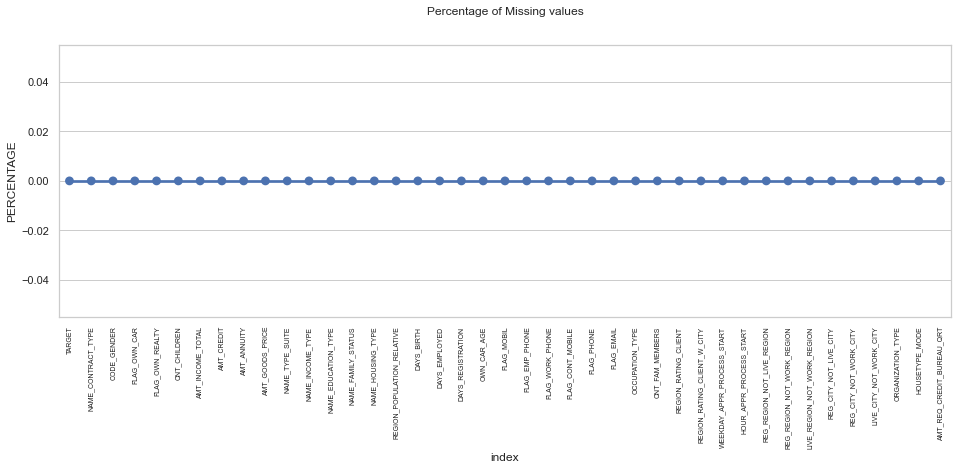

In [217]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

# Visualisation of Data

In [222]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='TARGET'>

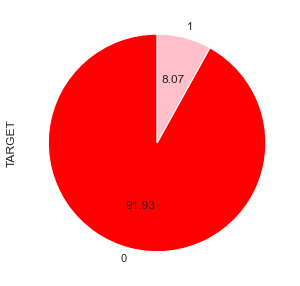

In [224]:
plt.figure(figsize=(5,5))
df['TARGET'].value_counts().plot.pie(autopct="%.2f", colors=["red","pink"], startangle=90)

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='CODE_GENDER'>

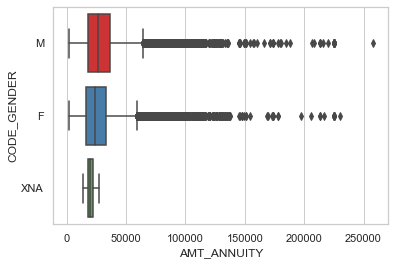

In [225]:
#Visualisation of Credited Amount for Gender using BOXPLOT
sns.set(style='whitegrid')
sns.boxplot(x='AMT_ANNUITY', y='CODE_GENDER', data=df, palette="Set1")

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='CODE_GENDER'>

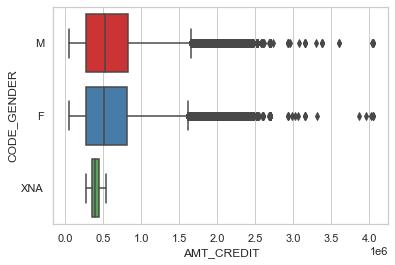

In [226]:
#Visualisation of Credited Amount for Gender using BOXPLOT
sns.set(style='whitegrid')
sns.boxplot(x='AMT_CREDIT', y='CODE_GENDER', data=df, palette="Set1")

<AxesSubplot:xlabel='AMT_CREDIT'>

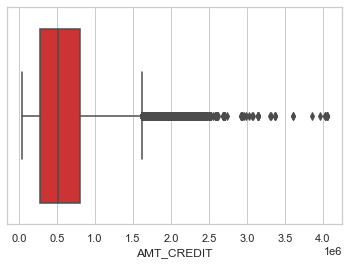

In [227]:
#Visualisation of Credited Amount using BOXPLOT
sns.set(style='whitegrid')
sns.boxplot(x='AMT_CREDIT', data=df, palette="Set1")

In [228]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_QRT
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.265474
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.794056
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,261.000000


In [15]:
#Drop rows
#df.dropna(how = 'any', inplace = True)

In [ ]:
DATA EXPLORATION :-
    
*1. * Plot distibution of individual predictors by Target

# Univariate Analysis

<ipython-input-229-7f7fdc2bac3e>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  countplt, ax = plt.subplots(figsize = (10,7))


<Figure size 432x288 with 0 Axes>

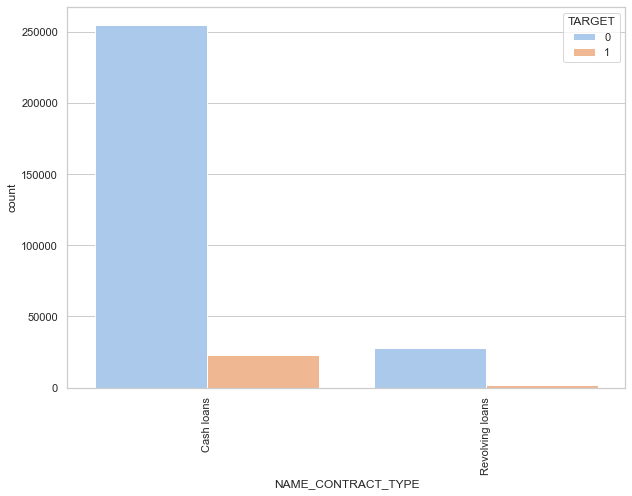

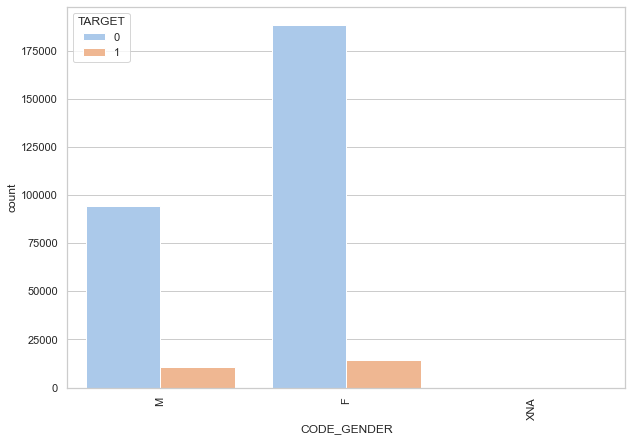

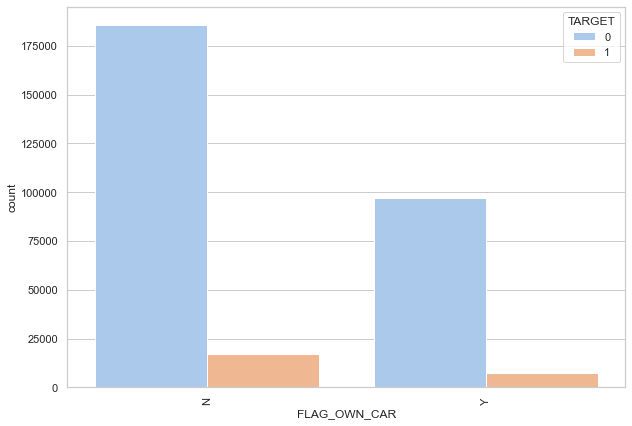

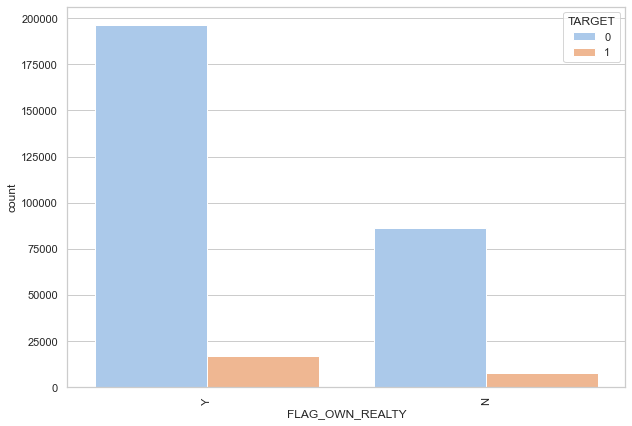

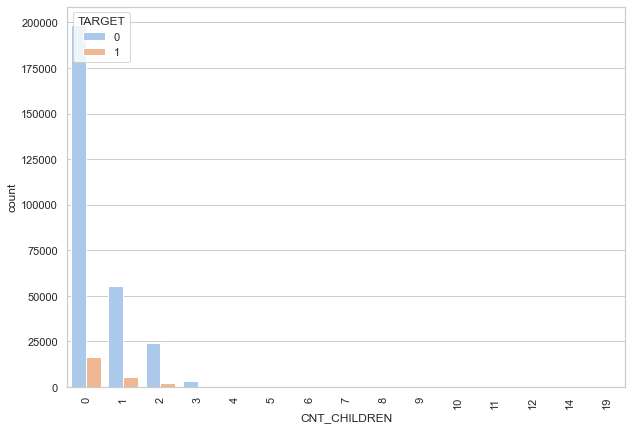

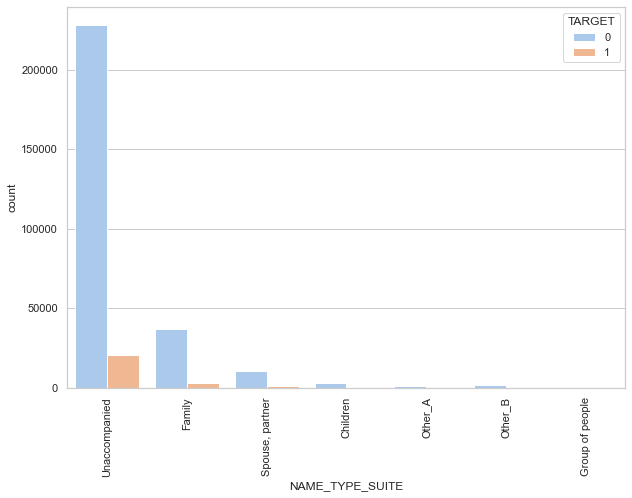

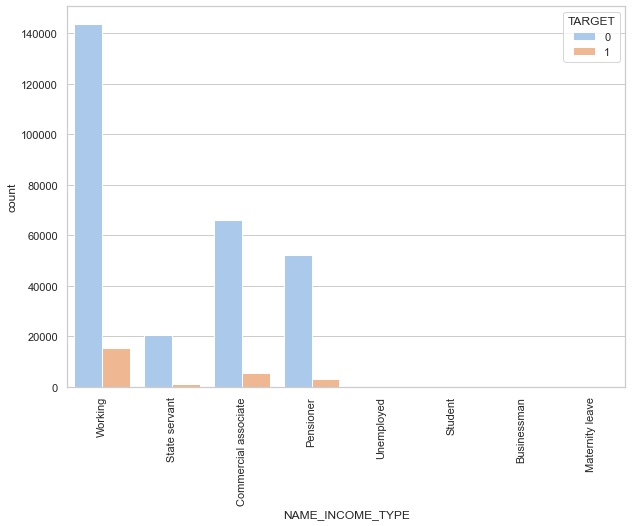

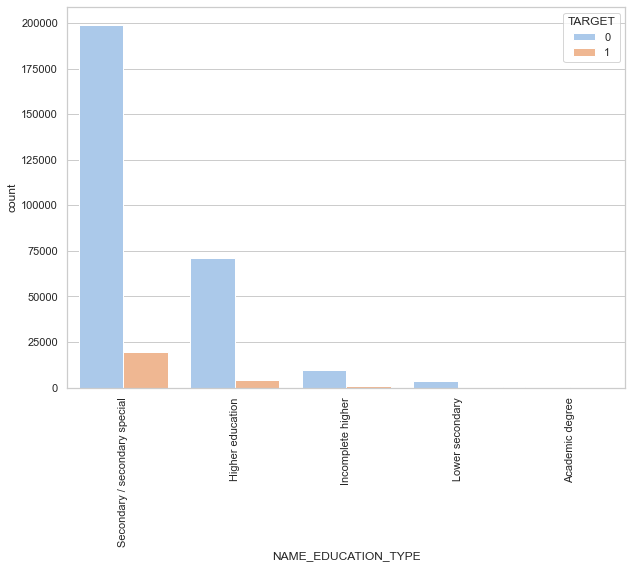

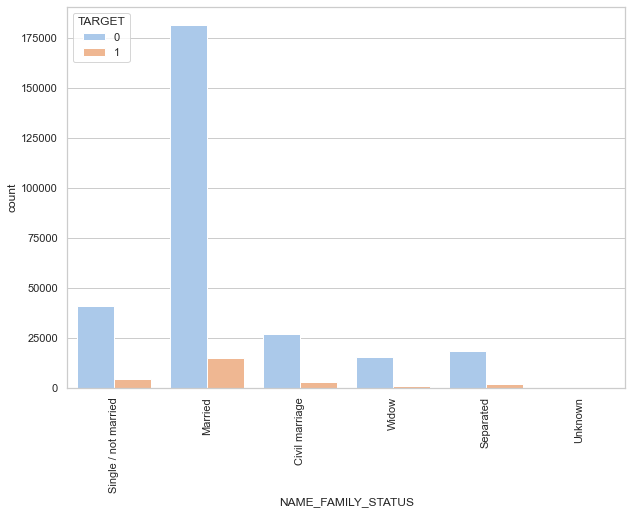

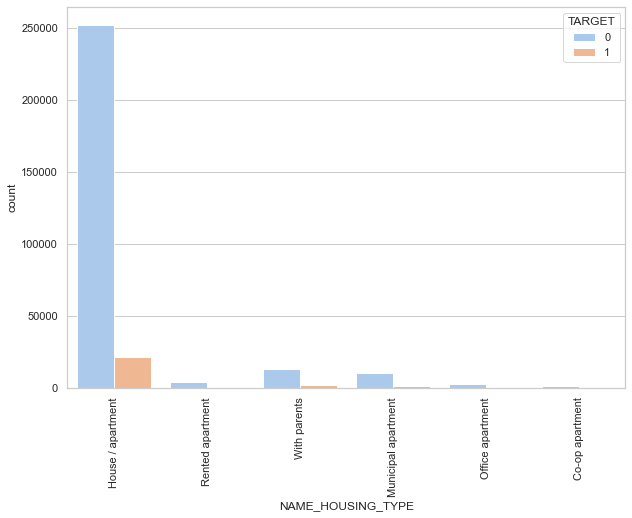

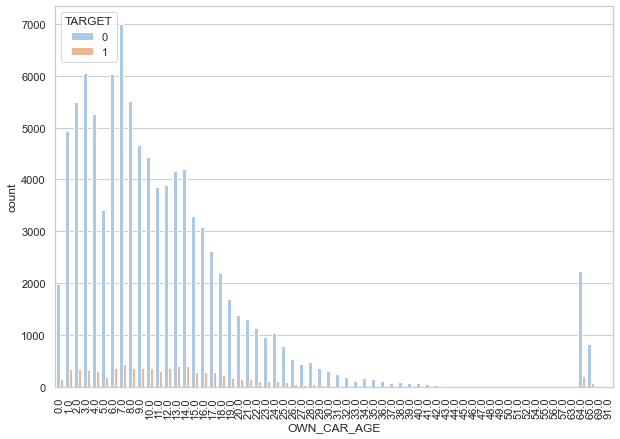

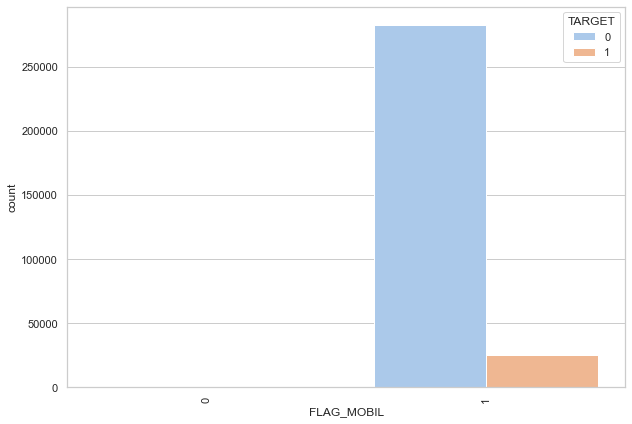

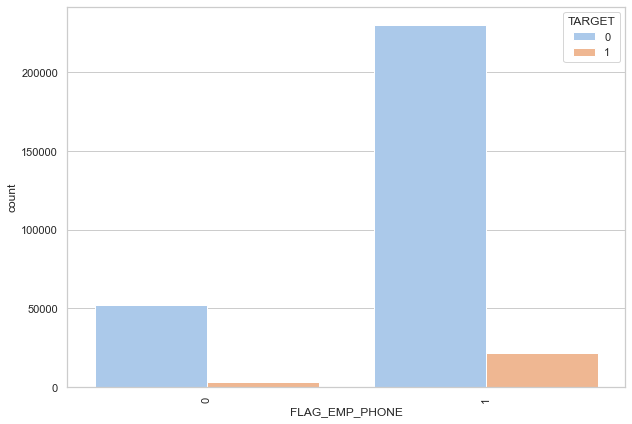

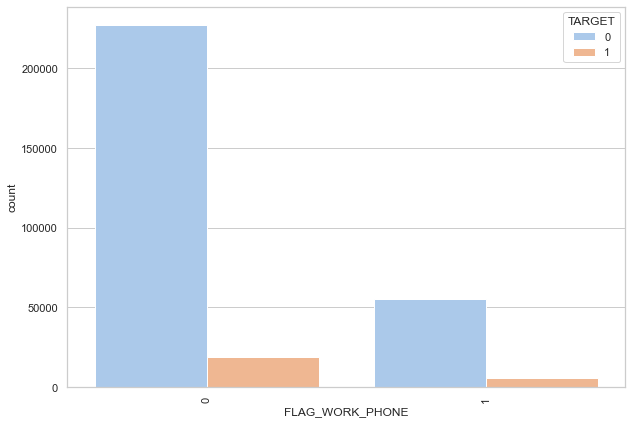

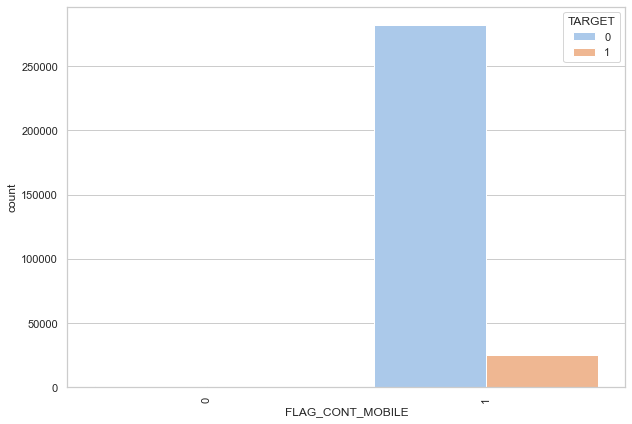

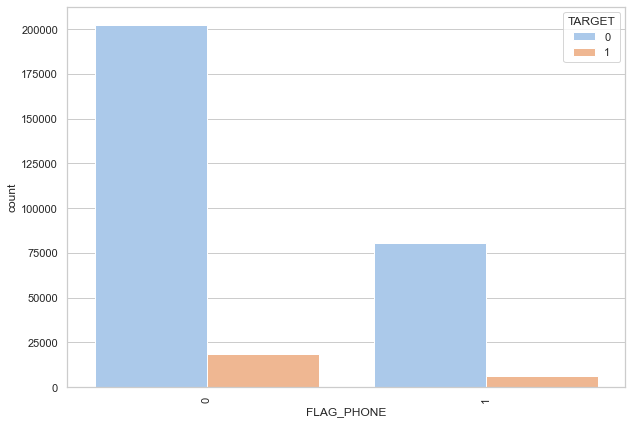

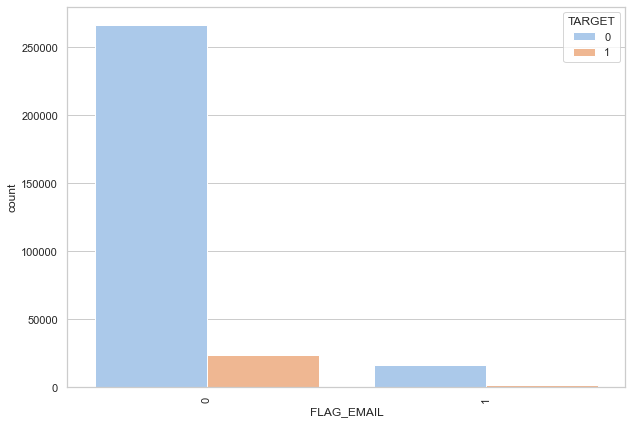

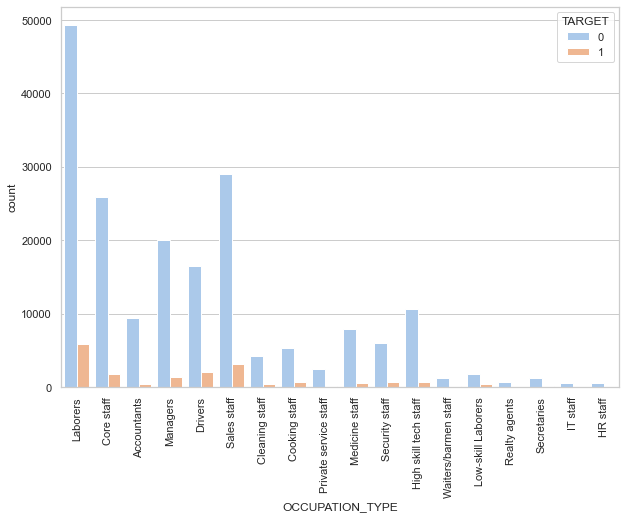

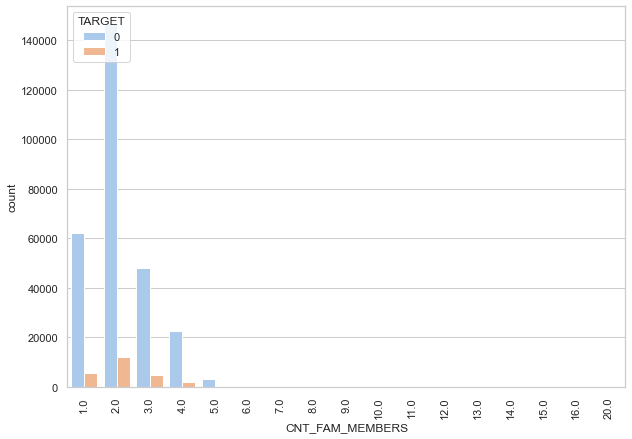

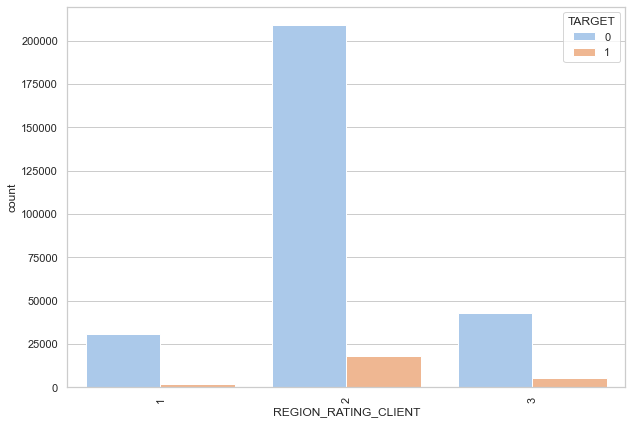

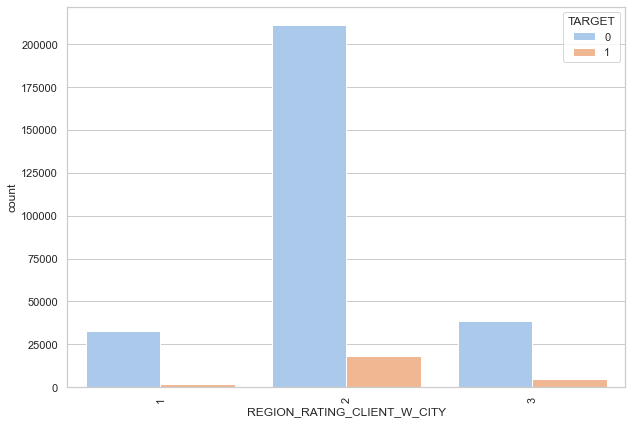

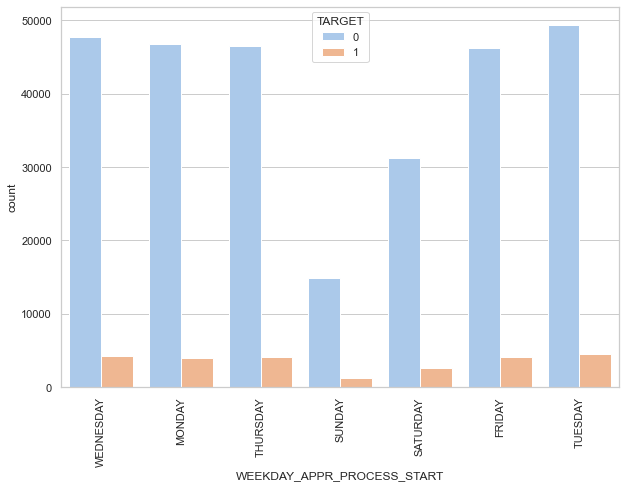

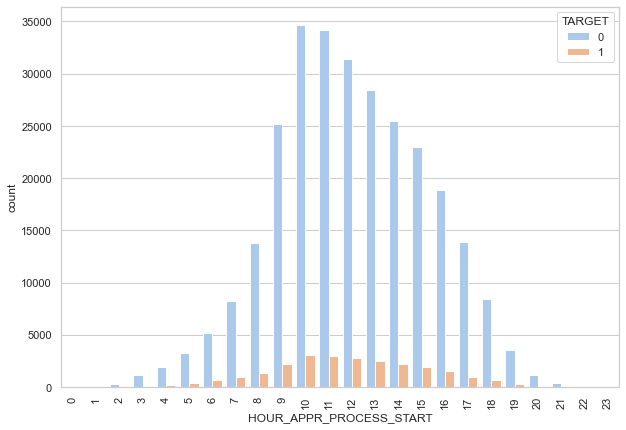

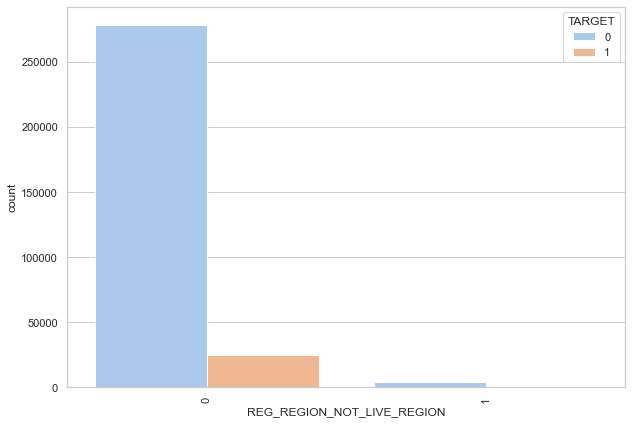

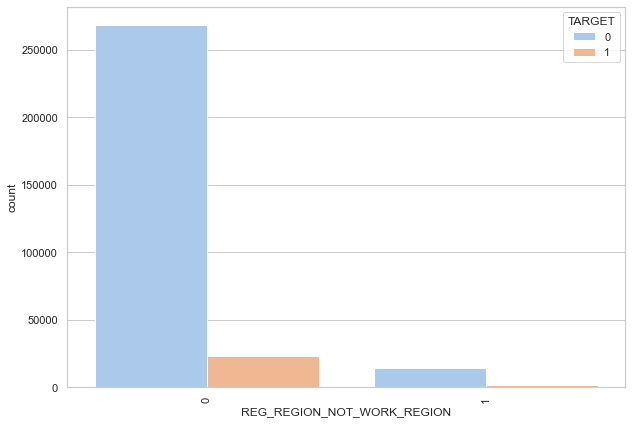

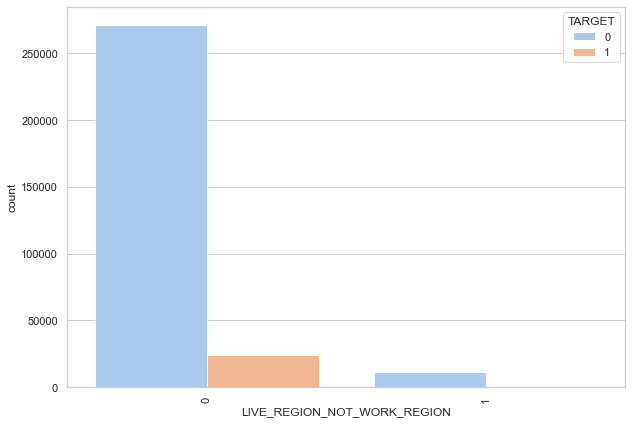

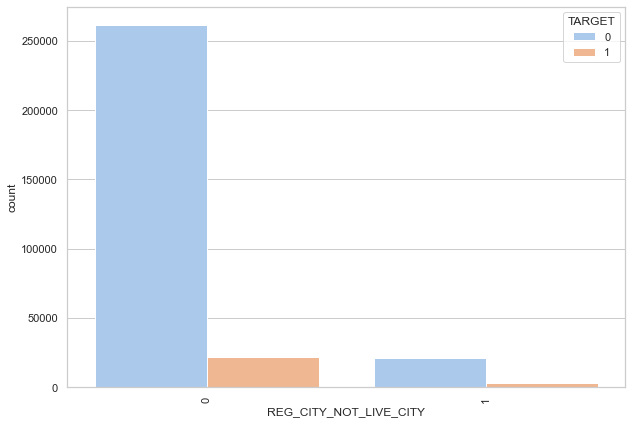

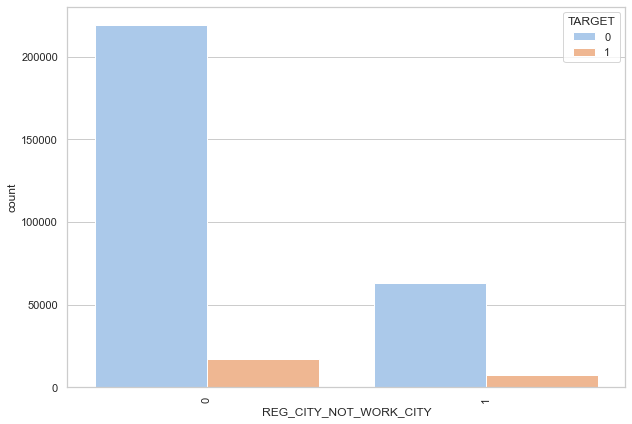

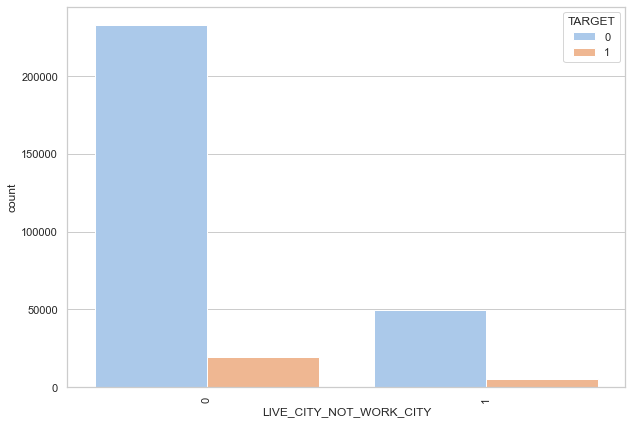

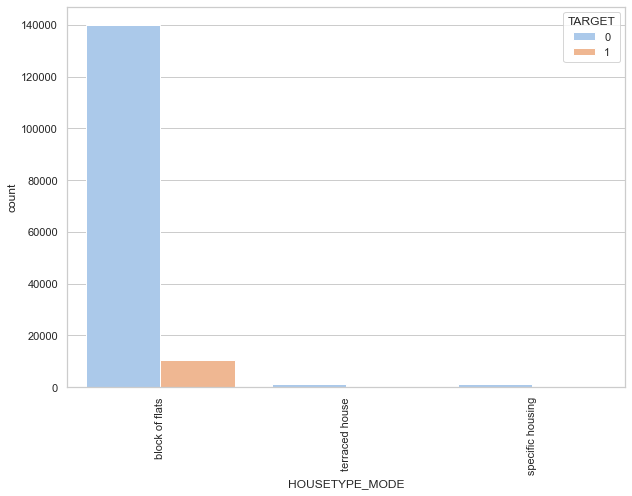

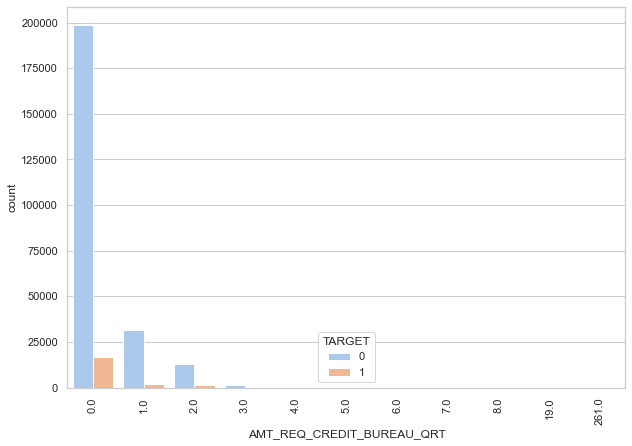

In [229]:
#colors = ['r', 'g', 'b', 'y']

for i, predictor in enumerate(df.drop(columns=['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
                                               'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'ORGANIZATION_TYPE'])):
    plt.figure(i)
    countplt, ax = plt.subplots(figsize = (10,7))
    plt.xticks(rotation=90)
    ax=sns.countplot(data=df, x=predictor, hue='TARGET', palette='pastel' )
    
    
    #countplt, ax = plt.subplots(figsize = (10,7))
#ax =sns.countplot(x = 'day', data=deliveries)

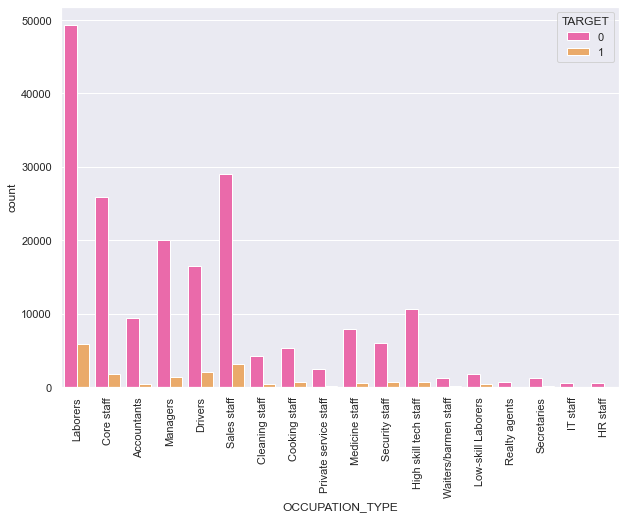

In [230]:
sns.set_theme(style="darkgrid")
countplt, ax = plt.subplots(figsize = (10,7))
plt.xticks(rotation=90)
ax=sns.countplot(data=df, x='OCCUPATION_TYPE', hue='TARGET', palette='spring' )

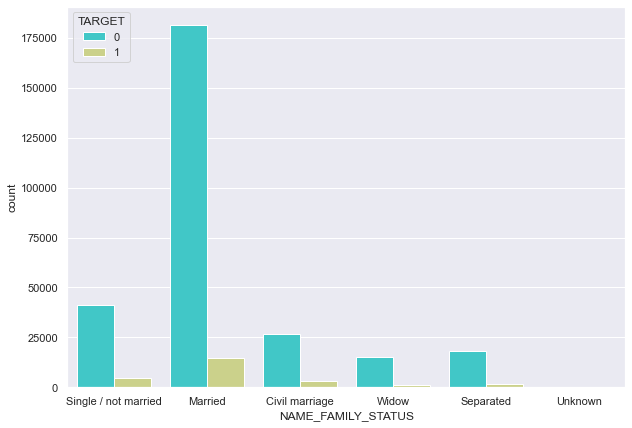

In [231]:
#sns.countplot(x ='NAME_CONTRACT_TYPE', data = df)
sns.set_theme(style="darkgrid")
countplt, ax = plt.subplots(figsize = (10,7))
ax=sns.countplot(data=df, x='NAME_FAMILY_STATUS', hue='TARGET', palette='rainbow' )

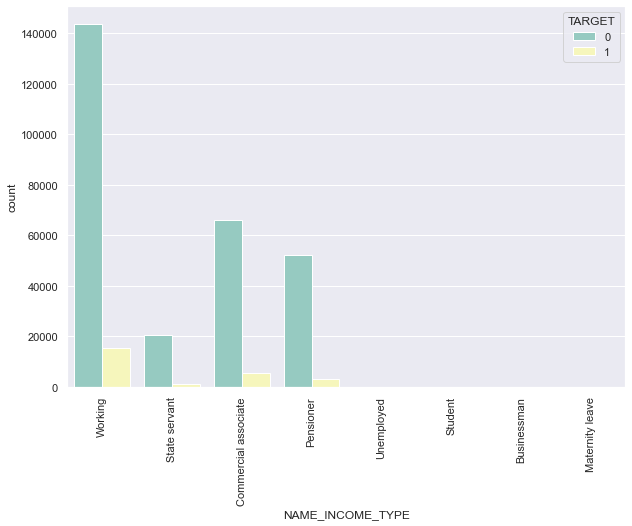

In [232]:
#sns.countplot(x ='NAME_CONTRACT_TYPE', data = df)
sns.set_theme(style="darkgrid")
countplt, ax = plt.subplots(figsize = (10,7))
plt.xticks(rotation=90)
ax=sns.countplot(data=df, x='NAME_INCOME_TYPE', hue='TARGET', palette='Set3' )

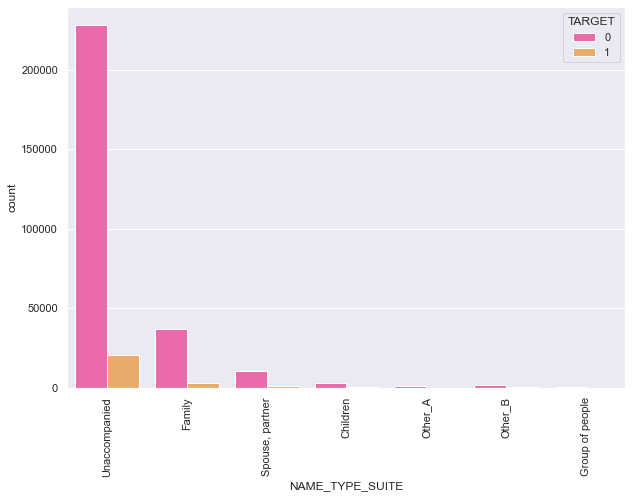

In [233]:
#sns.countplot(x ='NAME_CONTRACT_TYPE', data = df)
sns.set_theme(style="darkgrid")
countplt, ax = plt.subplots(figsize = (10,7))
plt.xticks(rotation=90)
ax=sns.countplot(data=df, x='NAME_TYPE_SUITE', hue='TARGET', palette='spring' )

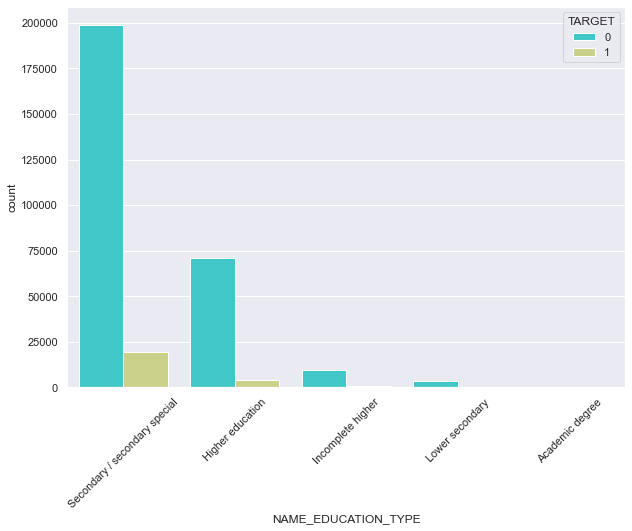

In [234]:
#sns.countplot(x ='NAME_CONTRACT_TYPE', data = df)
sns.set_theme(style="darkgrid")
countplt, ax = plt.subplots(figsize = (10,7))
plt.xticks(rotation=45)
ax=sns.countplot(data=df, x='NAME_EDUCATION_TYPE', hue='TARGET', palette='rainbow' )

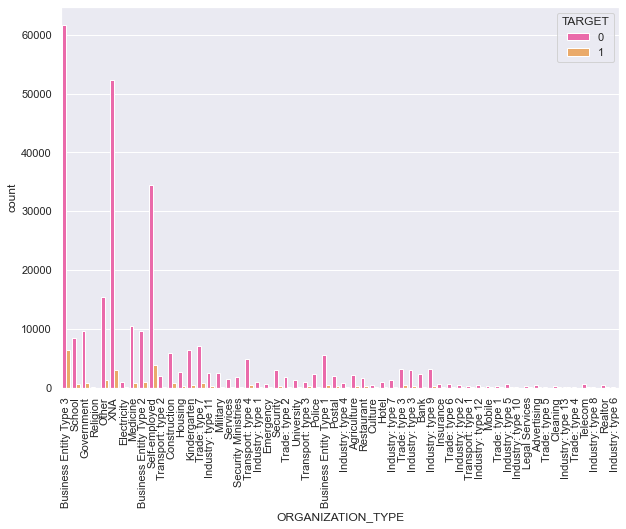

In [235]:
#sns.countplot(x ='NAME_CONTRACT_TYPE', data = df)
sns.set_theme(style="darkgrid")
countplt, ax = plt.subplots(figsize = (10,7))
plt.xticks(rotation=90)
ax=sns.countplot(data=df, x='ORGANIZATION_TYPE', hue='TARGET', palette='spring' )

Text(0.5, 1.0, 'Mobile Phone reachability')

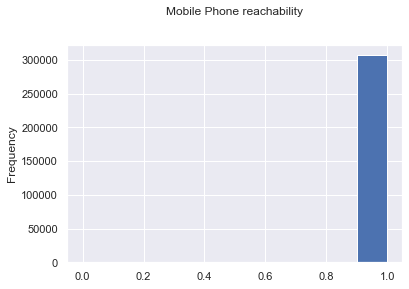

In [236]:
df['FLAG_CONT_MOBILE'].plot.hist()
plt.title('Mobile Phone reachability')

Text(0.5, 1.0, 'Children Distribution')

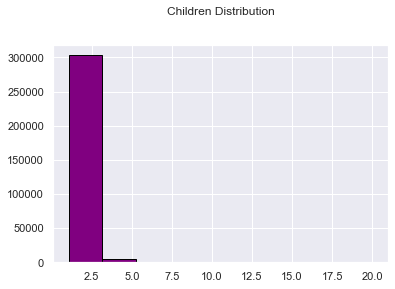

In [237]:
#df['REG_CITY_NOT_WORK_CITY'].plot.hist()
plt.hist(df['CNT_CHILDREN'], bins=9, align='right', color='purple', edgecolor='black')
plt.title('Children Distribution')

In [122]:
new_df1_target0=df.loc[df["TARGET"]==0]
new_df1_target1=df.loc[df["TARGET"]==1]

Text(0.5, 1.0, 'Clients age in days at the time of Application')

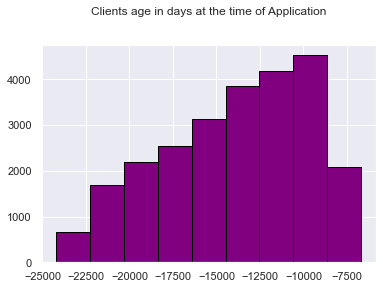

In [238]:
#new_df1_target1['DAYS_BIRTH'].plot.hist()
plt.hist(new_df1_target1['DAYS_BIRTH'], bins=9, align='right', color='purple', edgecolor='black')
plt.title('Clients age in days at the time of Application')

Text(0.5, 1.0, 'Home Phone Flag')

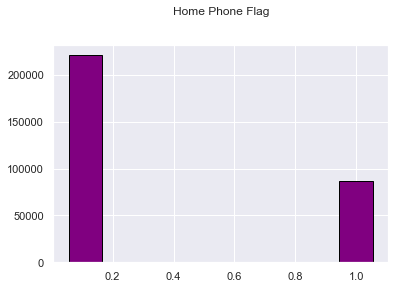

In [239]:
plt.hist(df['FLAG_PHONE'], bins=9, align='right', color='purple', edgecolor='black')
plt.title('Home Phone Flag')

Text(0.5, 1.0, 'Annuity Amount by Target')

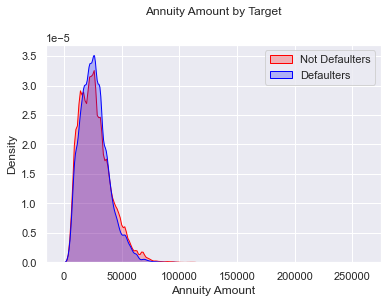

In [240]:
Mth = sns.kdeplot(df.AMT_ANNUITY [(df["TARGET"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df.AMT_ANNUITY [(df["TARGET"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["Not Defaulters","Defaulters"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Annuity Amount')
Mth.set_title('Annuity Amount by Target')

Text(0.5, 1.0, 'Credited Amount by Target')

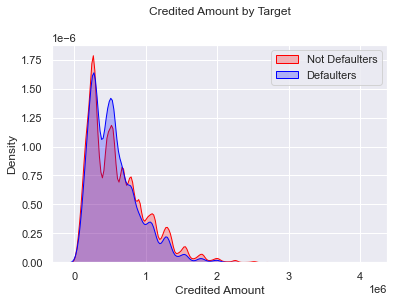

In [241]:
Mth = sns.kdeplot(df.AMT_CREDIT [(df["TARGET"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df.AMT_CREDIT [(df["TARGET"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["Not Defaulters","Defaulters"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Credited Amount')
Mth.set_title('Credited Amount by Target')

* Build a corelation of all predictors with 'Target' *

<AxesSubplot:>

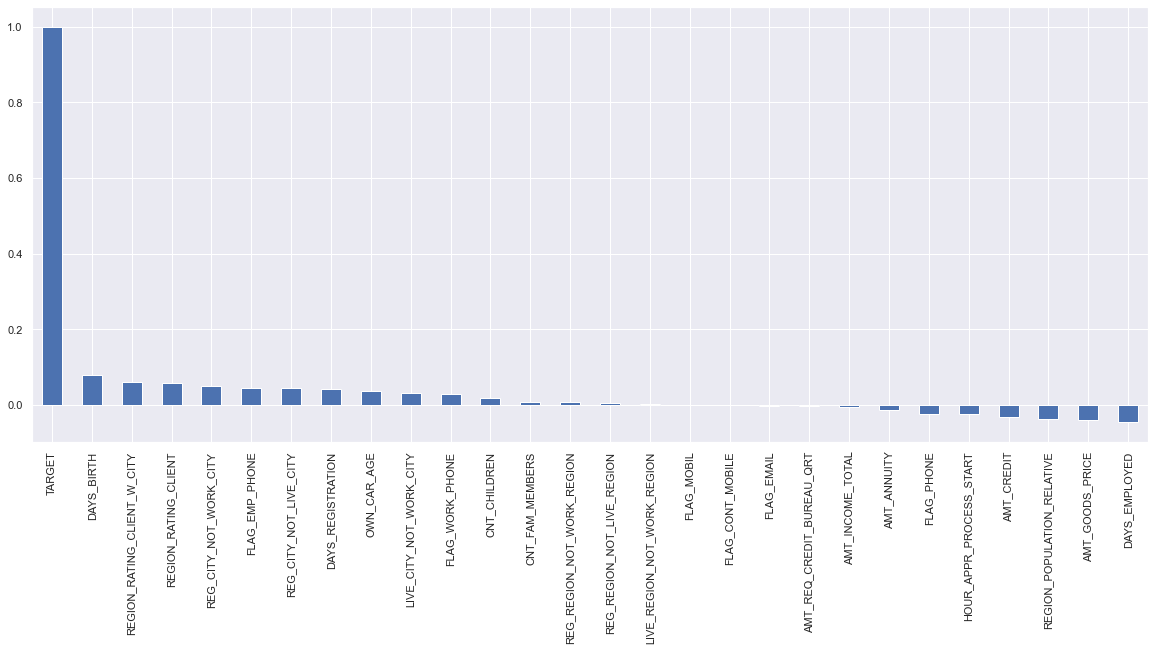

In [242]:
plt.figure(figsize=(20,8))
df.corr()['TARGET'].sort_values(ascending = False).plot(kind='bar')

In [243]:
#cut_series, cut_intervals = pd.cut(cra_df.AMT_INCOME_TOTAL,bins=3,retbins=True)

df['quantiles'] = pd.qcut(df['AMT_INCOME_TOTAL'],6)
cr = df['quantiles'].value_counts()
cr

(147150.0, 180000.0]       61824
(25649.999, 90000.0]       57922
(117000.0, 147150.0]       50604
(225000.0, 117000000.0]    47118
(90000.0, 117000.0]        45234
(180000.0, 225000.0]       44809
Name: quantiles, dtype: int64

In [28]:
#cr.plot(kind='bar')

In [244]:
cra_df.drop(columns= ['AMT_INCOME_TOTAL'], axis=1, inplace=True)
cra_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
df1 = df['quantiles'].value_counts()

In [246]:
new_df1_target0_amt=df.loc[cra_df["TARGET"]==0]

<AxesSubplot:>

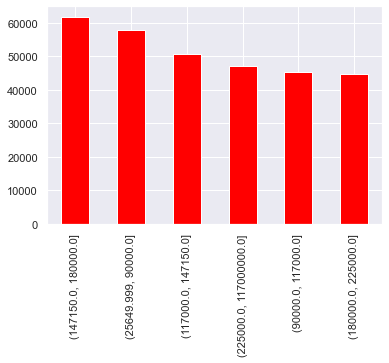

In [247]:
df1.plot(kind='bar', color = 'red')

# Bivariate Analysis

In [ ]:
new_df1_target0=df.loc[df["TARGET"]==0]
new_df1_target1=df.loc[df["TARGET"]==1]

In [248]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

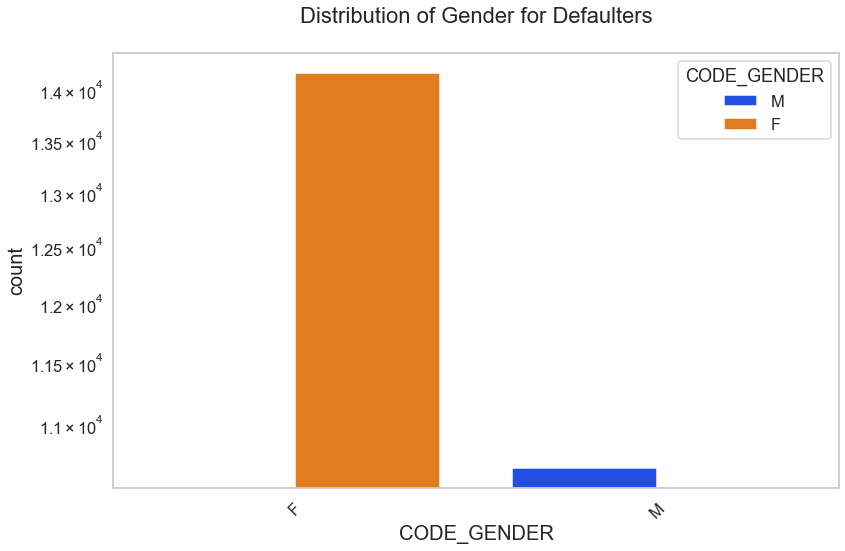

In [249]:
uniplot(new_df1_target1,col='CODE_GENDER',title='Distribution of Gender for Defaulters',hue='CODE_GENDER')

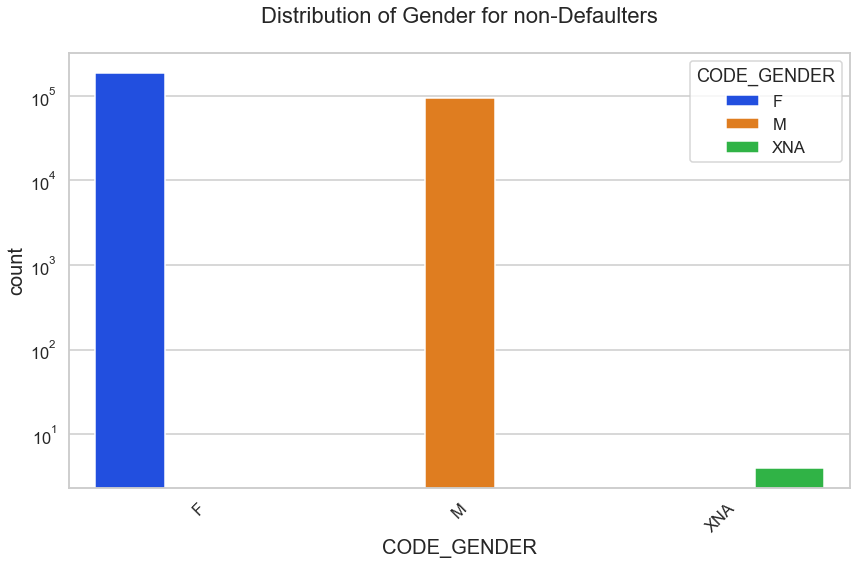

In [250]:
uniplot(new_df1_target0,col='CODE_GENDER',title='Distribution of Gender for non-Defaulters',hue='CODE_GENDER')

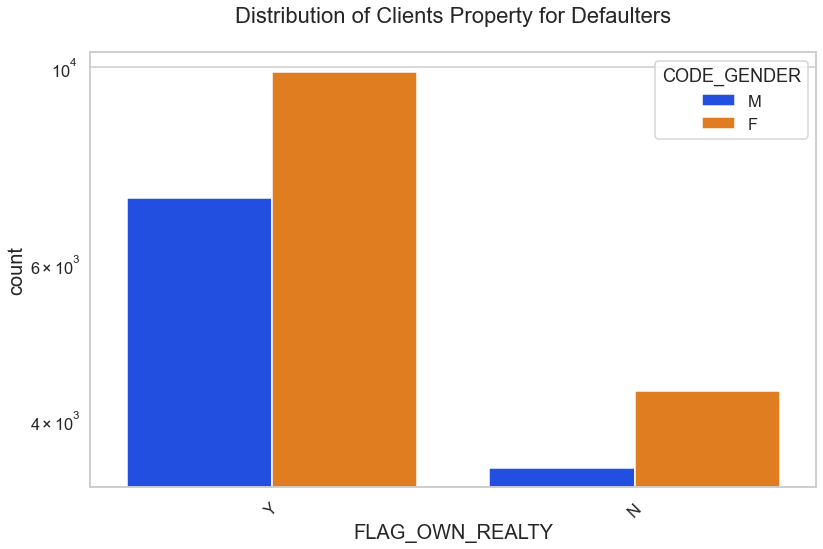

In [251]:
uniplot(new_df1_target1,col='FLAG_OWN_REALTY',title='Distribution of Clients Property for Defaulters',hue='CODE_GENDER')

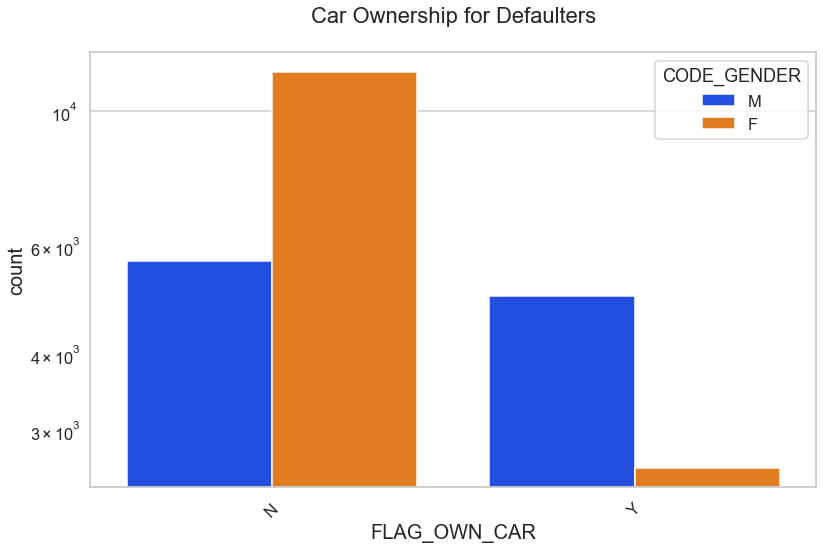

In [252]:
uniplot(new_df1_target1,col='FLAG_OWN_CAR',title='Car Ownership for Defaulters',hue='CODE_GENDER')

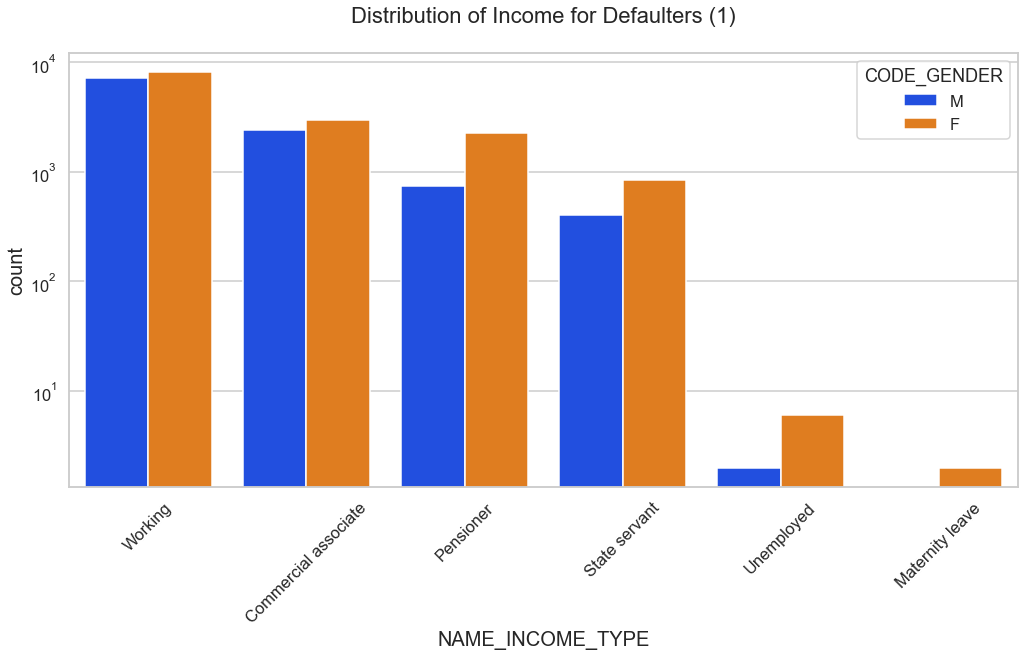

In [67]:
uniplot(new_df1_target1,col='NAME_INCOME_TYPE',title='Distribution of Income for Defaulters (1)',hue='CODE_GENDER')

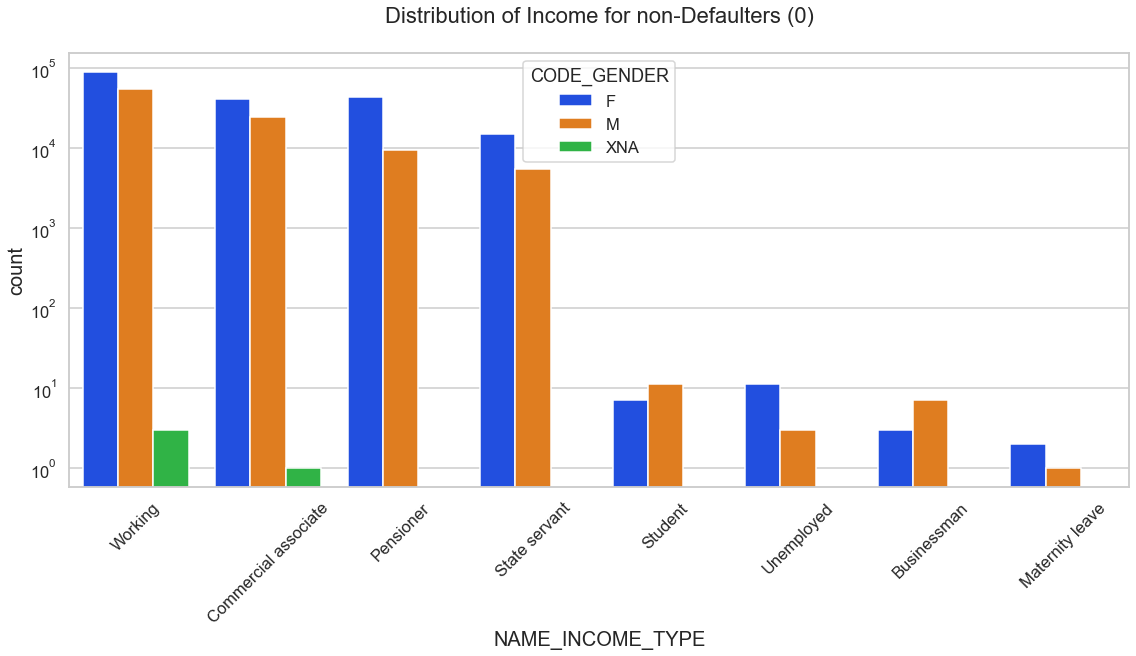

In [253]:
uniplot(new_df1_target0,col='NAME_INCOME_TYPE',title='Distribution of Income for non-Defaulters (0)',hue='CODE_GENDER')

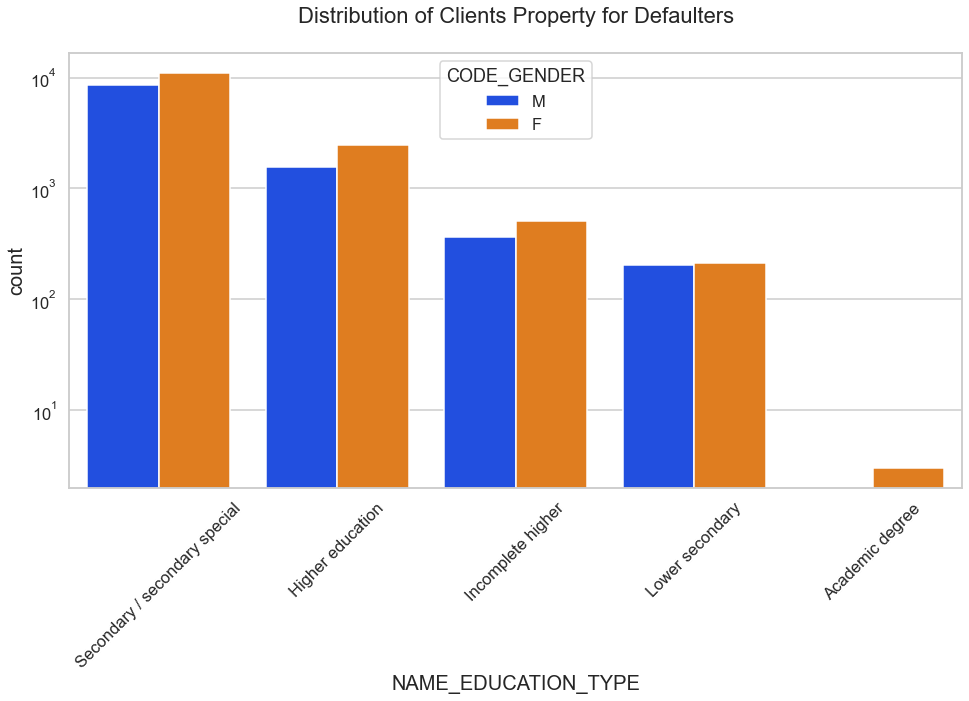

In [254]:
uniplot(new_df1_target1,col='NAME_EDUCATION_TYPE',title='Distribution of Clients Property for Defaulters',hue='CODE_GENDER')

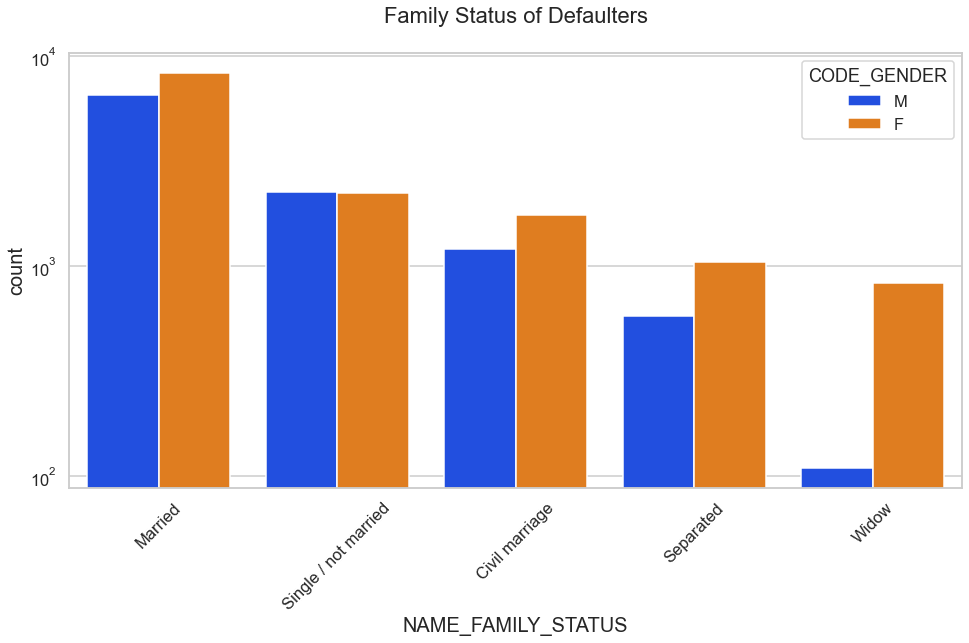

In [62]:
uniplot(new_df1_target1,col='NAME_FAMILY_STATUS',title='Family Status of Defaulters',hue='CODE_GENDER')

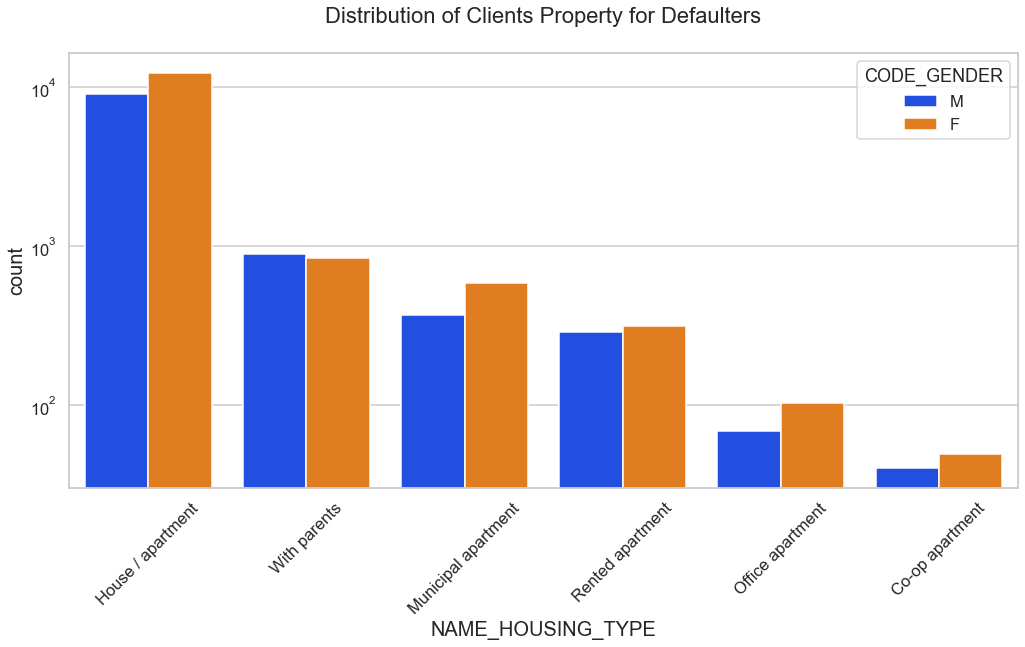

In [255]:
uniplot(new_df1_target1,col='NAME_HOUSING_TYPE',title='Distribution of Clients Property for Defaulters',hue='CODE_GENDER')

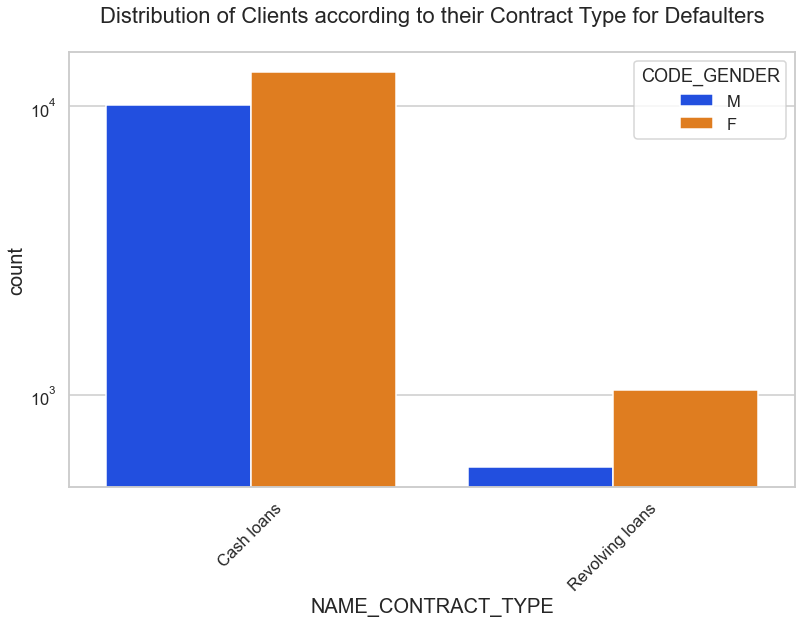

In [256]:
uniplot(new_df1_target1,col='NAME_CONTRACT_TYPE',title='Distribution of Clients according to their Contract Type for Defaulters',hue='CODE_GENDER')

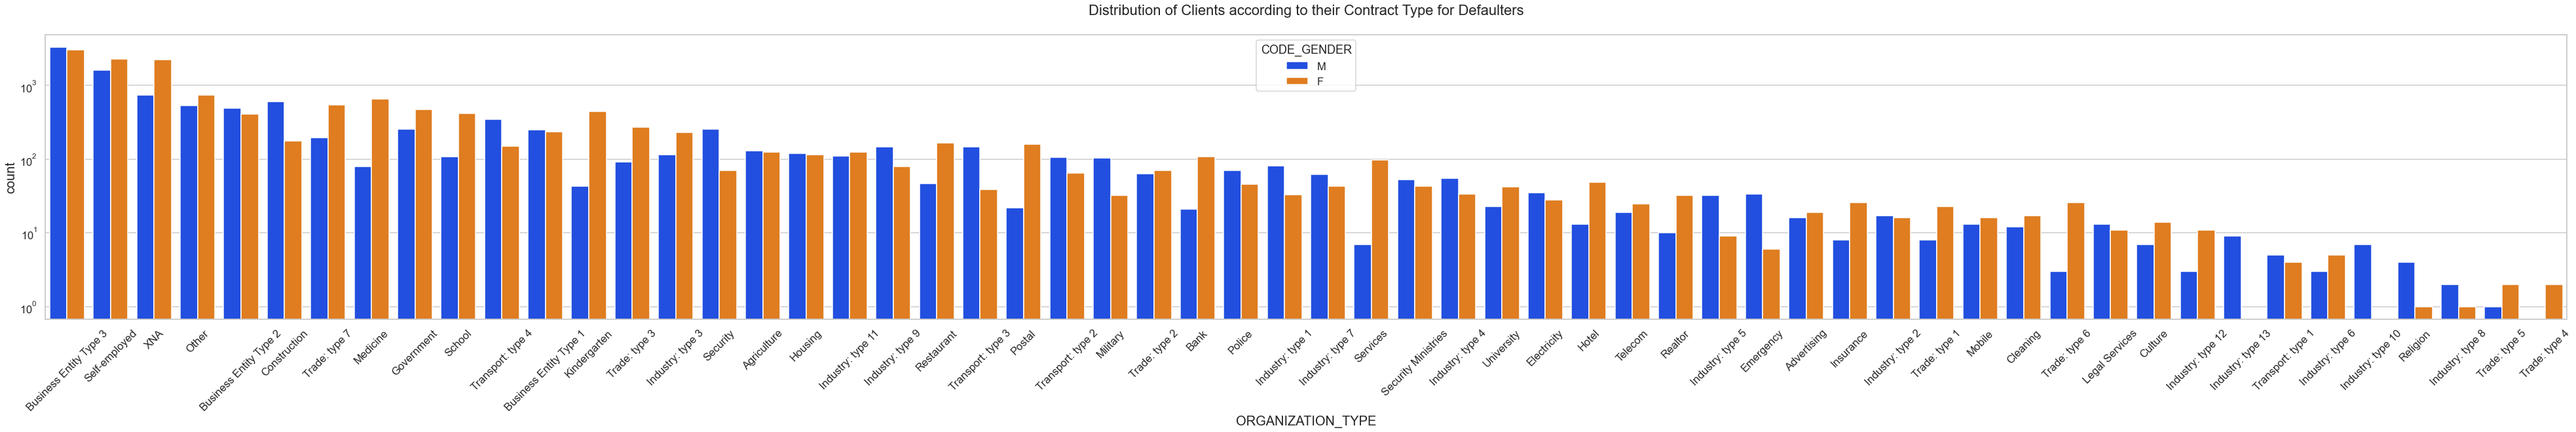

In [257]:
uniplot(new_df1_target1,col='ORGANIZATION_TYPE',title='Distribution of Clients according to their Contract Type for Defaulters',hue='CODE_GENDER')

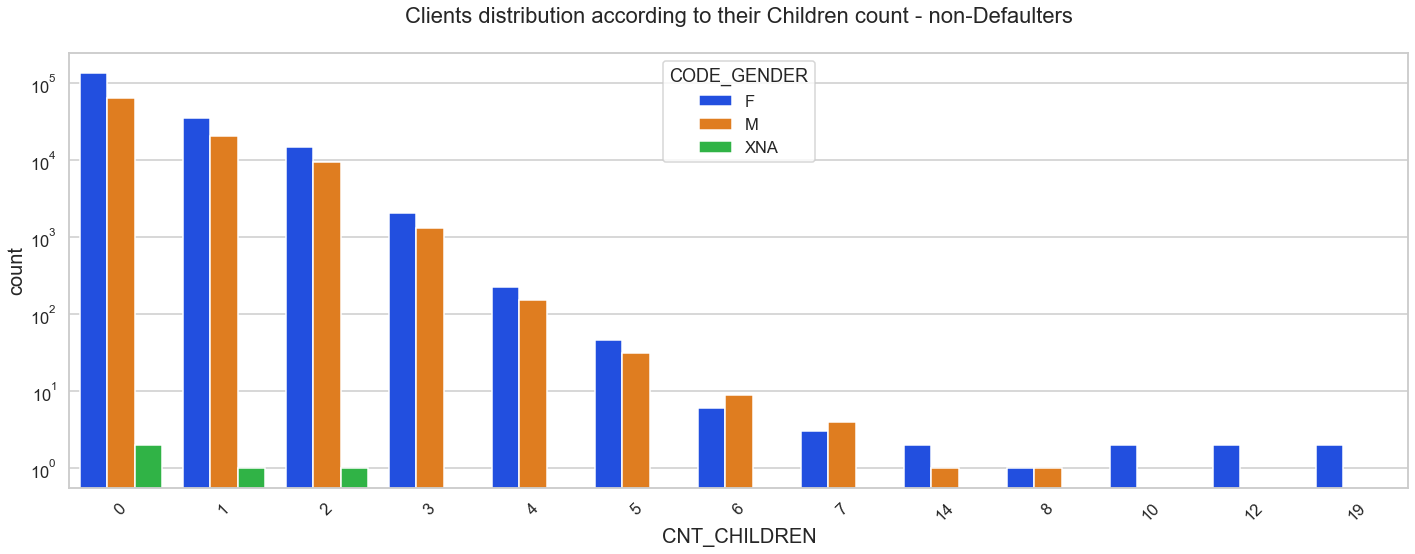

In [258]:
uniplot(new_df1_target0,col='CNT_CHILDREN',title='Clients distribution according to their Children count - non-Defaulters',hue='CODE_GENDER')

In the below, we show the relationship between Annuity Amount and the Credit Amount in our dataset colored by the TARGET (Defaulter/non-Defaulters) in each observation.  

#Credit Amount increases as Annuity Amount increase.

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='AMT_CREDIT'>

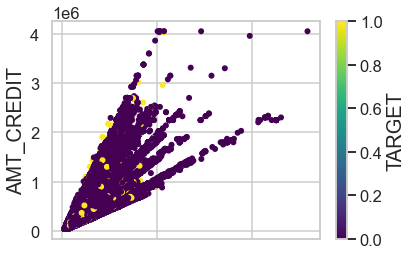

In [259]:
df.plot.scatter(x='AMT_ANNUITY', y='AMT_CREDIT', c='TARGET', colormap='viridis')

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='AMT_CREDIT'>

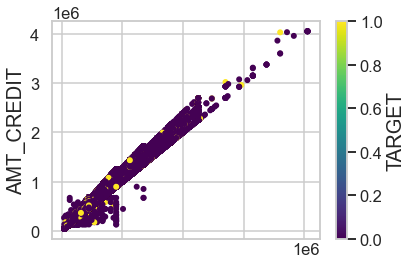

In [260]:

df.plot.scatter(x='AMT_GOODS_PRICE', y='AMT_CREDIT', c='TARGET', colormap='viridis')

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='AMT_ANNUITY'>

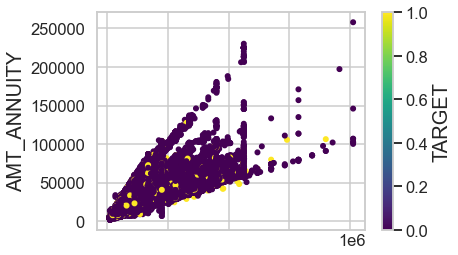

In [261]:

df.plot.scatter(x='AMT_GOODS_PRICE', y='AMT_ANNUITY', c='TARGET', colormap='viridis')

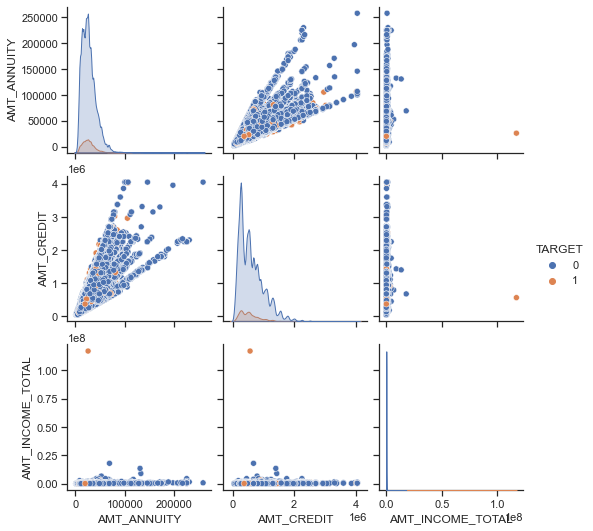

In [262]:
sns.set(style="ticks")
sns.pairplot(df[["AMT_ANNUITY","AMT_CREDIT","AMT_INCOME_TOTAL","TARGET"]], hue="TARGET")

In [263]:
df.corr()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_QRT
TARGET,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,0.041975,...,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.002022
CNT_CHILDREN,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,0.183395,...,0.025423,0.024781,-0.007292,-0.013319,0.008185,0.014835,0.020072,0.070650,0.069957,-0.007836
AMT_INCOME_TOTAL,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,0.027805,...,-0.085465,-0.091735,0.036459,0.031191,0.062340,0.058059,0.003574,0.006431,0.008285,0.004859
AMT_CREDIT,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,0.009621,...,-0.101776,-0.110915,0.052738,0.024010,0.051929,0.052609,-0.026886,-0.018856,0.000081,0.015925
AMT_ANNUITY,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,0.038514,...,-0.128525,-0.141682,0.052269,0.041299,0.079420,0.074550,-0.006214,0.000896,0.010084,0.010124
AMT_GOODS_PRICE,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,0.011565,...,-0.103786,-0.112208,0.062320,0.026111,0.053171,0.052864,-0.027212,-0.020333,-0.001309,0.016432
REGION_POPULATION_RELATIVE,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,-0.053820,...,-0.532877,-0.531535,0.171285,0.002118,0.056944,0.081016,-0.050499,-0.044057,-0.015188,-0.001279
DAYS_BIRTH,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,0.331912,...,0.009361,0.008073,0.091064,0.065486,0.095819,0.069567,0.180382,0.242401,0.158882,-0.011799
DAYS_EMPLOYED,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,-0.210242,...,0.032750,0.034624,-0.091138,-0.035803,-0.107150,-0.095539,-0.090516,-0.254559,-0.218101,0.015345
DAYS_REGISTRATION,0.041975,0.183395,0.027805,0.009621,0.038514,0.011565,-0.053820,0.331912,-0.210242,1.000000,...,0.080210,0.074038,-0.010908,0.028213,0.036787,0.027560,0.064334,0.099874,0.072658,-0.001308


<AxesSubplot:>

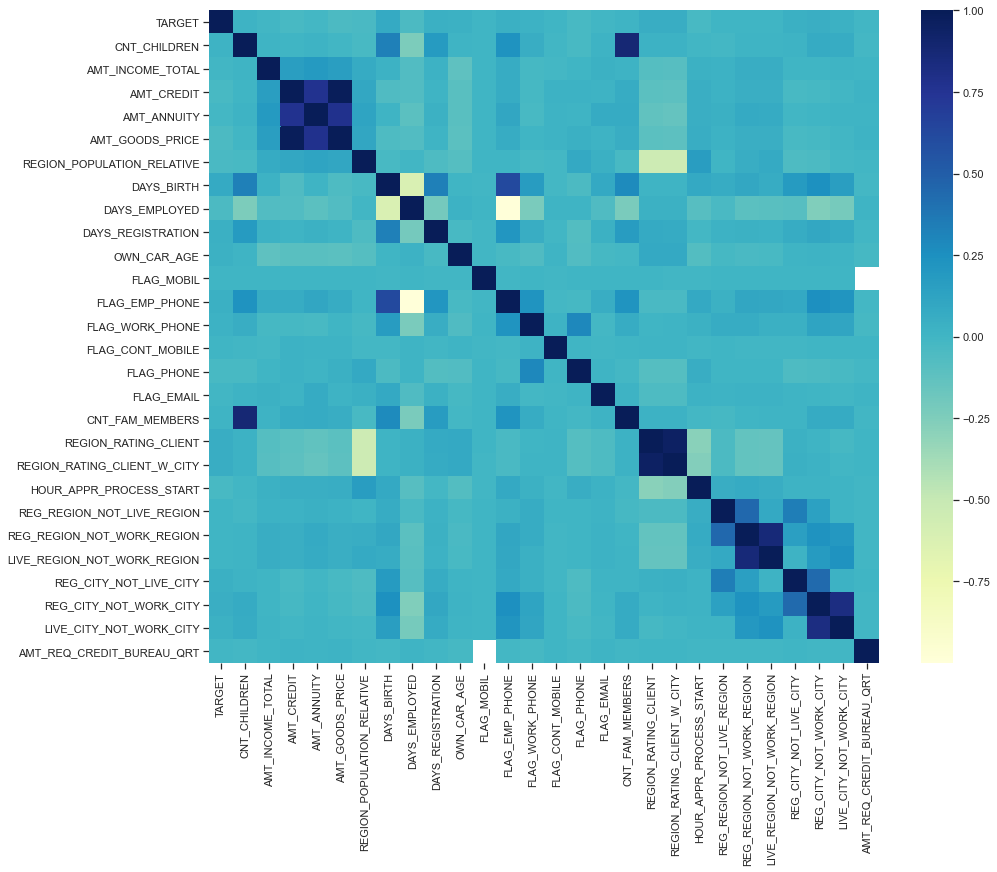

In [265]:
plt.figure(figsize=(15,12))
#sns.heatmap(df.corr(), cmap="Paired")

sns.heatmap(df.corr(), annot=False, cmap="YlGnBu")

# CONCLUSION

In [ ]:
We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between 
different features. 

These are some of the quick insights from this exercise:

1. Females are the highest kind of Defaulters.
2. Married Clients are the highest kind of Defaulters.
3. Secondary or secondary special educated customers are highest defaulters.
4. Clients having house/apartment are the highest defaulters.
5. Working customers are the highest Defaulters.
6. Family members of the Client and the the no of children the Client has appear highly, positively, correlated – this is shown 
   in the pair plot and correlation matrix outputs
7. From the heatmap, we can conclude that Goods price amount is highly correlated with the amount credited.
8. No of days the client is employed is -vely correlated with the clients workphone number